### Student Details

Student name:AKHIL RAGHU NATH

Student ID:23048417

# Description

In this task, we will use NSL-KDD dataset. We will use the NSL-KDD dataset to do multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset. If you completed the network security task in the previous activity (i.e., if you are in the BSc in CyberSecurity), you will have seen this already. For those that have not seen this dataset before, you will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

The aim of the NSL-KDD dataset is to enable training a machine learning algorithm to identify different types of cyber attacks based on network trafiic features. The different attacks can be: denial-of-service (dos), Remote to user (r2l), probing attack (probe), User-to-Root (U2R). I hope this means something to the CyberSecurity cohort. For the rest of us, don't worry, we can just see it as a generic classification task.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. However, in this task, we are going to investigate only the numerical features. So, in the code just below, I have stripped out all of the non-numerical features, and provide you with the numpy arrays `train_X`, `train_Y`, `test_X`, and `test_Y`.

Our aim will be to use the available data to train an algorithm to predict the type of attack that is occurring. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features.

In [1]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y = train_df['attack_category']
test_Y = test_df['attack_category']

# In this case, we are only going to use the numeric columns for our predictions
train_X = train_df[numeric_cols]
test_X = test_df[numeric_cols]

print(train_X.shape)
print(test_X.shape)

(25192, 31)
(22544, 31)


Let's have a quick look at what some of the samples look like

In [2]:
# Let's look at the data
train_X

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


And let's look quickly at how many samples in each attack category we have

Text(0, 0.5, 'Attack category')

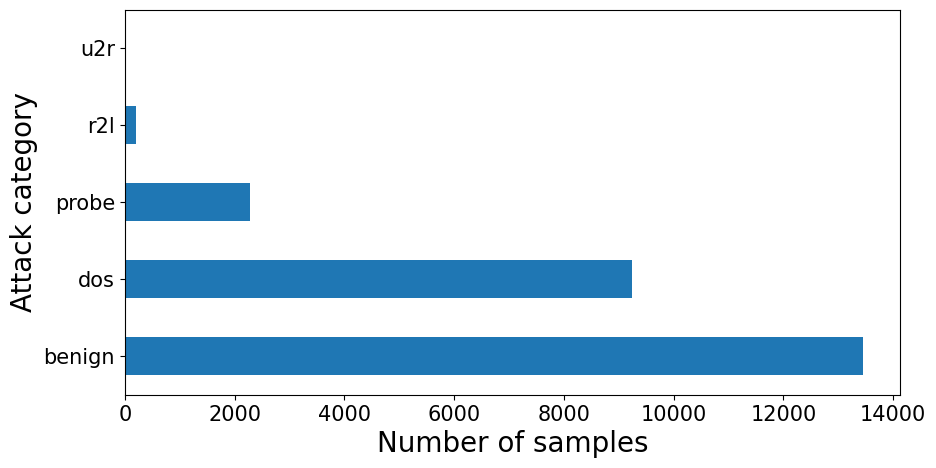

In [3]:
import matplotlib.pyplot as plt

train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)
plt.xlabel("Number of samples", fontsize=20)
plt.ylabel("Attack category", fontsize=20)

# Task 1- Feature Selection

### Part 1: Support Vector Classification

Here, we will use Support Vector Classification to predict the type of network attack that is occurriing, given a set of features. We will use a simple linear SVM Classification, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Classification, using [`sklearn`'s `svm.SVC` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). All parameters can be left at default except `kernel='linear'`
1. Predict the category of the network attack
1. Print the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
1. Discuss the confusion matrix briefly

You should see that the linear SVM Classification isn't too bad. You should get an accuracy around 0.73


<span style="color:red">Insert your code below</span>.

In [4]:
from sklearn.preprocessing import StandardScaler
# create a StandardScaler instance
scaler = StandardScaler()

# Applying scaling to training data
X_train_scaled = scaler.fit_transform(train_X)
# Applying scaling to test data
X_test_scaled = scaler.transform(test_X)


The accuracy score is 0.7308818310858765


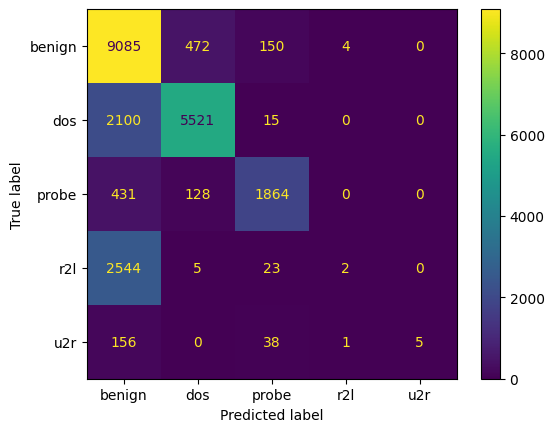

In [5]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

#training the data with SVC algorithm with linear kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled,train_Y)
y_pred=svc_model.predict(X_test_scaled)
#calculating the accuracy
print("The accuracy score is", accuracy_score(test_Y, y_pred))
#display the confusion matrix
results=confusion_matrix(test_Y, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=svc_model.classes_)
disp.plot()

<span style="color:red">Insert your text answers below</span>.

The confusion matrix provides a detailed view of how the model is performing for each class and  its ability to correctly classify  (the diagonal elements) and its misclassifications (off-diagonal elements). Here we see in first case(benign) 9085 classification is done correctly and 472 has misclassified as class 2 and 150 as class3 and 4 as class 5. Like that for others also it follows. we can say that Confusion matrix provides a detailed view of how well the algorithm's predictions align with the correct values of a classification problem

### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the `StandardScaler` to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small values. It is the nature of that data, and even though they may have a large influence on the type of attack, they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`.
6. Repeat the steps of Part 1: Train an SVC with the selected features and print the accuracy.
7. How does the accuracy compare to the the SVC with no features removed (from Part 1)?

<span style="color:red">Insert your code below</span>.

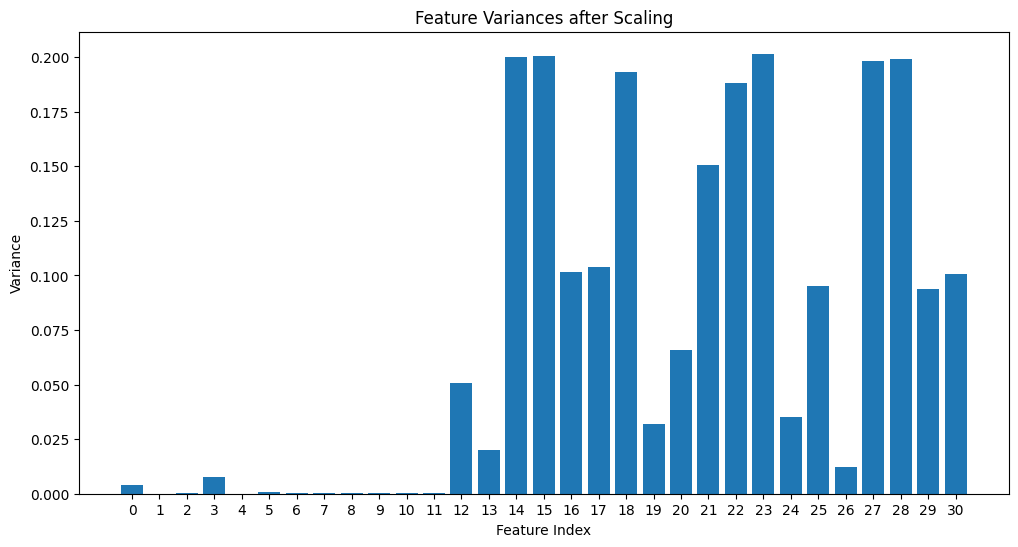

In [32]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

#Applying MinMaxScaler on train data
MMscaler = MinMaxScaler()
X_train_minMaxed=MMscaler.fit_transform(train_X)
# Calculate the variances of each feature
feature_variances = np.var(X_train_minMaxed, axis=0)

# Plot the variances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train_minMaxed.shape[1]), feature_variances, tick_label=range(X_train_minMaxed.shape[1]))
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.title('Feature Variances after Scaling')
plt.show()




In [29]:
# Create a VarianceThreshold object with a threshold of 0.0013 to avoid 3 features
threshold_value=0.00013
selector = VarianceThreshold(threshold=threshold_value)
X_selected = selector.fit_transform(X_train_minMaxed)
print("Features before doing Variance Threshold",X_train_minMaxed.shape[1])
print("Features after doing Varaince Threshold", X_selected.shape[1])

Features before doing Variance Threshold 31
Features after doing Varaince Threshold 28


In [30]:
# Applying scaling to training data
Stdscaler = StandardScaler()
X_train_scale = Stdscaler.fit_transform(X_selected)
#train an SVC with above selected data
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scale,train_Y)


SVC(kernel='linear')

The accuracy score is 0.7307931156848829


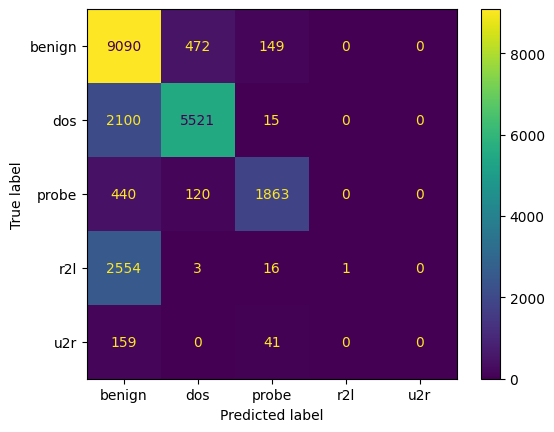

In [35]:
#test data is scaled with Minmax scaler ,since without this it is getting less accuracy(43%-45%),and as per the discussion with lecturer using scaling for better accuracy.
X_test_minMaxed=MMscaler.transform(test_X)
#Applying Variance threshold to test data
X_test_selected=selector.transform(X_test_minMaxed)
# Applying scaling to test data
X_test_scale = Stdscaler.transform(X_test_selected)
#predicting with trained model
y_pred=svc_model.predict(X_test_scale)

#print accuracy and confusion matrix
print("The accuracy score is", accuracy_score(test_Y, y_pred))
results=confusion_matrix(test_Y, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=svc_model.classes_)
disp.plot()

<span style="color:red">Insert your text answers below</span>.

Comaparing both without feature removal and with feature removal it is evident that a slight or neglible reduction in the accuracy is seen with 3 features removed.So as per the above inferance we can easily says that removal of feature is the time efficient and accuracy is not that much effected when we removed small value features.



### Part 3: Univariate Feature Selection - `f_classif`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_classif` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), as we are doing a classification. `f_classif` uses the ANOVA F-value to determine features to select. More info on ANOVA is available [here](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w).

The `SelectKBest` functionality coupled with `f_classif`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 31)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) to pick the top `k` features from our dataset
3. Train a new SVM classification with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed)
4. Use the `accuracy_score` function to get the accuracy at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the accuracy versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" accuracy value compare with the SVM before removing any features?

this will take a few minutes to run, go get a coffee!

<span style="color:red">Insert your code below</span>.

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# iniate an empty list
accuracy_scores = []
scaler = StandardScaler()

# Applying scaling to training data and tranforming both data
X_train_value = scaler.fit_transform(train_X)
X_test_value = scaler.transform(test_X)
for i in range(1,32):
  #applying SelectKBest and transforming both data
  KBest=SelectKBest(f_classif, k=i)
  X_new = KBest.fit_transform(X_train_value,train_Y)
  #print(X_new.shape)
  test_X_new = KBest.transform(X_test_value)
  #Training the model
  svc_model = SVC()
  svc_model.fit(X_new,train_Y)
  #predicting the accuracy
  y_pred=svc_model.predict(test_X_new)
  accuracy=accuracy_score(test_Y, y_pred)
  accuracy_scores.append(accuracy)
  print(f"The accuracy score when k = {i}, is",accuracy )
  #print(X_new)

The accuracy score when k = 1, is 0.6269517388218595
The accuracy score when k = 2, is 0.6272178850248403
The accuracy score when k = 3, is 0.6439850958126331
The accuracy score when k = 4, is 0.6438963804116394
The accuracy score when k = 5, is 0.6464247693399574
The accuracy score when k = 6, is 0.6487757274662882
The accuracy score when k = 7, is 0.6488644428672817
The accuracy score when k = 8, is 0.6568931866572036
The accuracy score when k = 9, is 0.6848828956706884
The accuracy score when k = 10, is 0.684749822569198
The accuracy score when k = 11, is 0.6827537260468417
The accuracy score when k = 12, is 0.6995209368346345
The accuracy score when k = 13, is 0.7019162526614621
The accuracy score when k = 14, is 0.7018275372604684
The accuracy score when k = 15, is 0.7068843151171044
The accuracy score when k = 16, is 0.721611071682044
The accuracy score when k = 17, is 0.7191270404542228
The accuracy score when k = 18, is 0.711985450674237
The accuracy score when k = 19, is 0.721

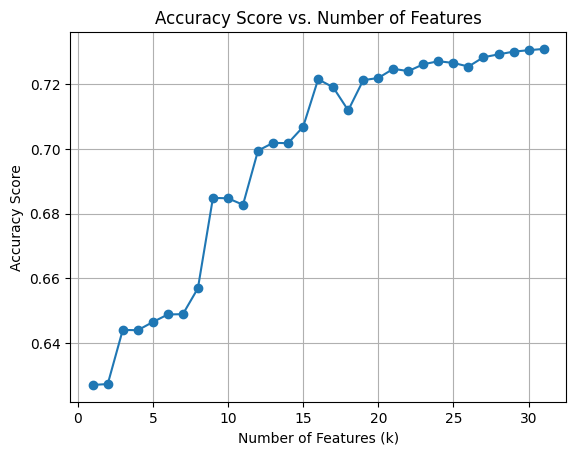

In [52]:
import matplotlib.pyplot as plt

# Plot the accuracy scores
plt.plot(range(1,32), accuracy_scores, marker='o')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Features')
plt.grid(True)
plt.show()


<span style="color:red">Insert your question answers below</span>.

As per the above accuracy score vs Number of features we can observe that it is nearly equals to original(without removing any features) value when it has 19 feature or more and as per the above plot we can see that when k =21 it is getting nearer(1% less than) to same accuracy as with all features.so i will reduce around 10 feature in the final solution if we take processing time into account rather than accuracy.Accuracy is increasing in a narrow margin around after k=20. So we can say that in this case even if we reduced around 10 features we can achieve as near as a slight erduced accuracy with less time. The best accuracy value is  same (0.73)as  that in Task 1(0.73).




# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output.

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the dataset.

In [14]:
train_df.head(8)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,benign,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,benign,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,benign,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,benign,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos,1


Ok, so in a small handfull of features, we can spot that (perhaps) `num_root` and `num_compromised` are correlated? Let's plot a few of them that might be correlated.

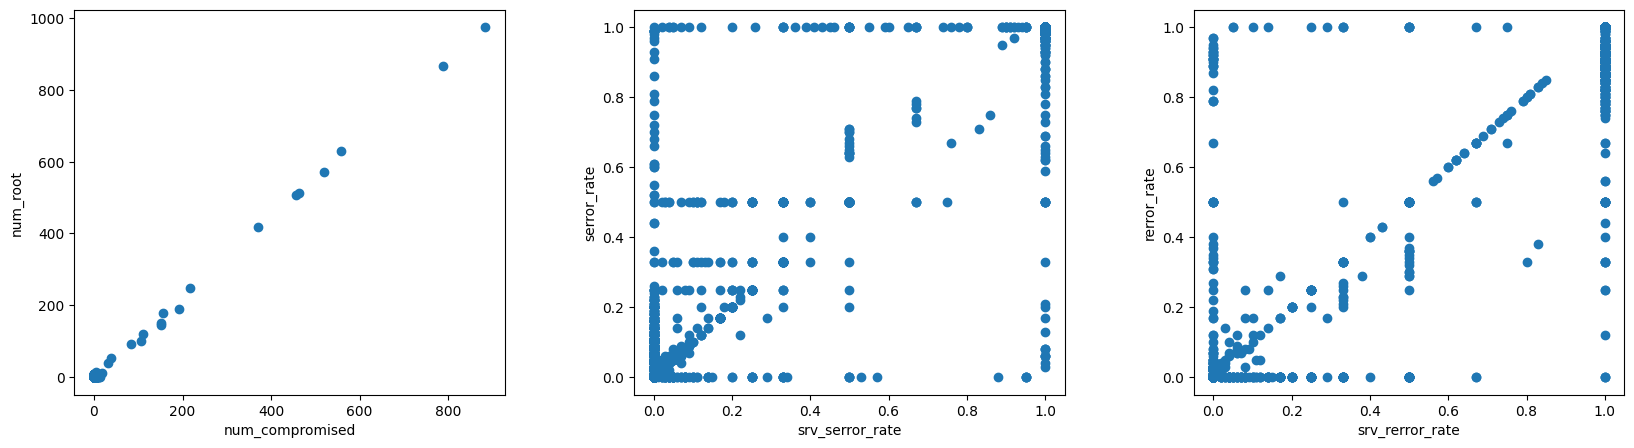

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(train_df['num_compromised'], train_df['num_root']);
ax[0].set(xlabel='num_compromised', ylabel='num_root')

ax[1].scatter(train_df['srv_serror_rate'], train_df['serror_rate']);
ax[1].set(xlabel='srv_serror_rate', ylabel='serror_rate')

ax[2].scatter(train_df['srv_rerror_rate'], train_df['rerror_rate']);
ax[2].set(xlabel='srv_rerror_rate', ylabel='rerror_rate')

plt.show()

Note that the last two plots, while there are outliers in the plots (values at 1.0), most of the data lies along the diagonal. Just the drawing doesn't show this well, though it is highly correlated.

Yes, we can see that there is some correlation between the features we selected here. We can probably assume that there is a causal relationship between them - CyberSecurity specialists wish to comment?

So there is certainly some redundancy here. And likely there are more hidden correlations that we don't know about!

# Task

On to this weeks task. We will perform PCA on the data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a Support Vector Classification on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default
3. Try 99% and 90%
4. Play around with desired variance to see if you can reduce the number of features while maintaining an accuracy close to the original dataset above

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
3. How about if we set the variance to 99%? And how about 99.9%?
4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

<span style="color:red">Insert your code below</span>.

PCA with n_components=0.95

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# create a StandardScaler instance
scaler = StandardScaler()

# Applying scaling to training data
X_train_scaled = scaler.fit_transform(train_X)
# Applying scaling to test data
X_test_scaled = scaler.transform(test_X)
# Applying PCA to scaled data with 0.95%
pca = PCA(n_components=0.95)
X_pca_train=pca.fit_transform(X_train_scaled)
X_pca_test=pca.transform(X_test_scaled)
print(X_pca_train.shape)
print(X_pca_test.shape)


(25192, 19)
(22544, 19)


the accuracy score with pca component=0.95 is 0.7278655074520937


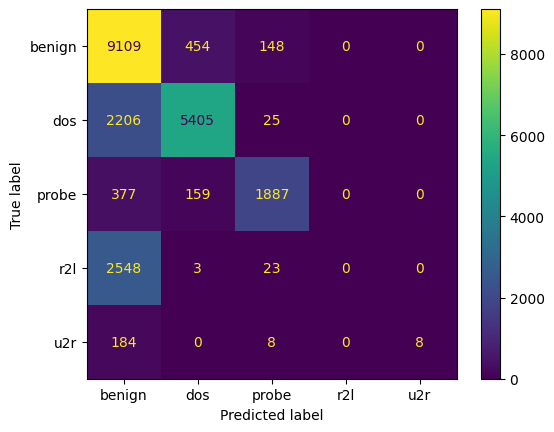

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
#training the data with SVC algorithm with linear kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_pca_train,train_Y)
y_predict=svc_model.predict(X_pca_test)
print("the accuracy score with pca component=0.95 is",accuracy_score(test_Y,y_predict))
results=confusion_matrix(test_Y, y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=svc_model.classes_)
disp.plot()


PCA with n_components=0.99

(22544, 23)
the accuracy score with pca component=0.99 is 0.7301721078779276


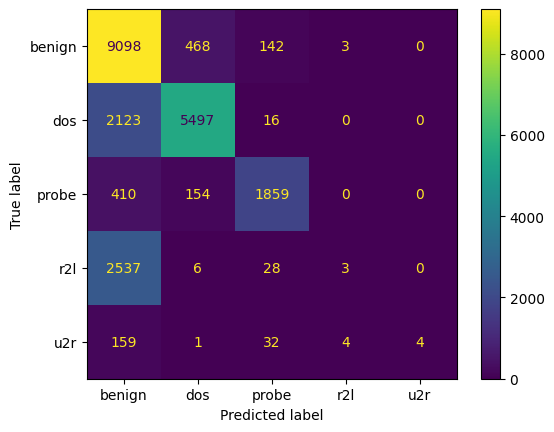

In [47]:

# Keep 99% of the variance
pca = PCA(n_components=0.99)
X_pca_train=pca.fit_transform(X_train_scaled)
X_pca_test=pca.transform(X_test_scaled)

#print(X_pca_train.shape)
print(X_pca_test.shape)
#Applying SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_pca_train,train_Y)
y_predict=svc_model.predict(X_pca_test)

print("the accuracy score with pca component=0.99 is",accuracy_score(test_Y,y_predict))
results=confusion_matrix(test_Y, y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=svc_model.classes_)
disp.plot()


PCA with n_components=0.999

(22544, 28)
the accuracy score with pca component=0.999 is 0.7298172462739532


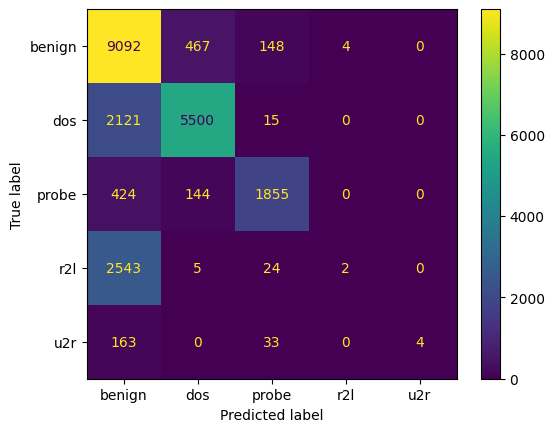

In [48]:
# Keep 99.9% of the variance
pca = PCA(n_components=0.999)
X_pca_train=pca.fit_transform(X_train_scaled)
X_pca_test=pca.transform(X_test_scaled)
#print(X_pca_train.shape)
print(X_pca_test.shape)
#training the data with SVC algorithm with linear kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_pca_train,train_Y)
y_predict=svc_model.predict(X_pca_test)
print("the accuracy score with pca component=0.999 is",accuracy_score(test_Y,y_predict))
results=confusion_matrix(test_Y, y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=svc_model.classes_)
disp.plot()






PCA with n_components=0.90

(22544, 16)
the accuracy score with pca component=0.999 is 0.7263129879347054


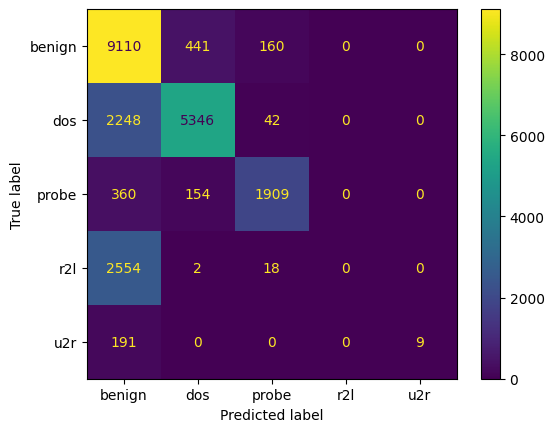

In [49]:


pca = PCA(n_components=0.90)
X_pca_train=pca.fit_transform(X_train_scaled)
X_pca_test=pca.transform(X_test_scaled)
#print(X_pca_train.shape)
print(X_pca_test.shape)
svc_model = SVC(kernel='linear')
svc_model.fit(X_pca_train,train_Y)
y_predict=svc_model.predict(X_pca_test)
print("the accuracy score with pca component=0.999 is",accuracy_score(test_Y,y_predict))
results=confusion_matrix(test_Y, y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=svc_model.classes_)
disp.plot()


PCA(n_components=0.50)

(22544, 4)
the accuracy score with pca component=0.50 is 0.717042228530873


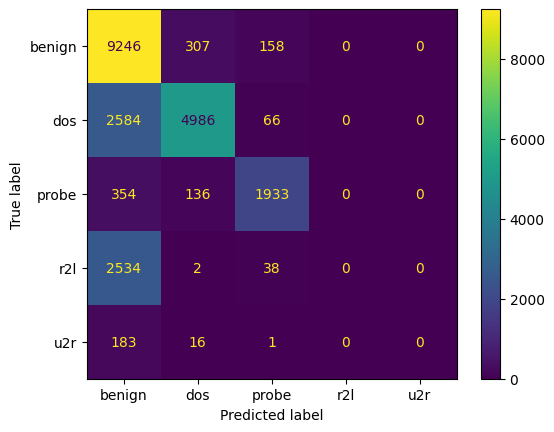

In [50]:

pca = PCA(n_components=0.50)
X_pca_train=pca.fit_transform(X_train_scaled)
X_pca_test=pca.transform(X_test_scaled)
#print(X_pca_train.shape)
print(X_pca_test.shape)
svc_model = SVC(kernel='linear')
svc_model.fit(X_pca_train,train_Y)
y_predict=svc_model.predict(X_pca_test)

print("the accuracy score with pca component=0.50 is",accuracy_score(test_Y,y_predict))
results=confusion_matrix(test_Y, y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=svc_model.classes_)
disp.plot()


PCA(n_components=0.10)

(22544, 1)
the accuracy score with pca component=0.50 is 0.6500621007806955


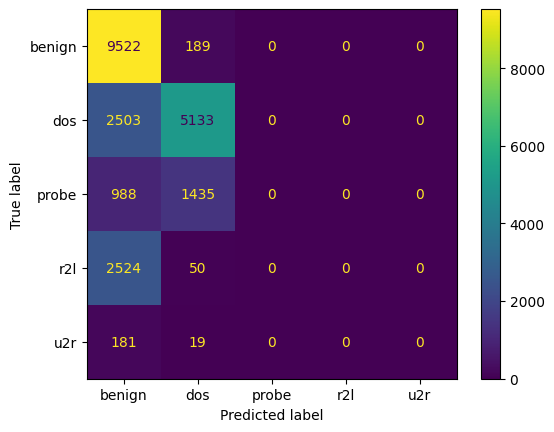

In [51]:
# Keep playing with the variances
pca = PCA(n_components=0.10)
X_pca_train=pca.fit_transform(X_train_scaled)
X_pca_test=pca.transform(X_test_scaled)
#print(X_pca_train.shape)
print(X_pca_test.shape)
svc_model = SVC(kernel='linear')
svc_model.fit(X_pca_train,train_Y)
y_predict=svc_model.predict(X_pca_test)

print("the accuracy score with pca component=0.50 is",accuracy_score(test_Y,y_predict))
results=confusion_matrix(test_Y, y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=results,display_labels=svc_model.classes_)
disp.plot()

1.How many new features are there after the PCA?

with selecting differnt values of n_components we can modify the features selected.As per my selection values are the following
with n_components=.95--19 feature
with n_components=.99--23 feature
with n_components=.999--28 feature
with n_components=.90--16 feature
with n_components=.50--4 feature
with n_components=.10--1 feature

2.Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy

By comparing accuracy even with 4 feature ,it is getting an accuracy of 71% which is remarkable since with all 31 feature we are nearer to 73%.So we can imply that for a time constraint project this model is s very effective but the prediction for classes with less labels not done correctly as per confusion matrix.



3.How about if we set the variance to 99%? And how about 99.9%?

With 99% we are getting an accuracy of 73.01% with 23 features and with .999 we are getting accuarcy of 72.98%,thats little odd, here eve though with more features( 23 for .99 and 28 for .999) also we are getting a slight reduce in accuracy may be those features doesnt have that much imaoact on the output.

4.Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Better accuracy is not seen with PCA but we have seen accuracy as same as Task 1 even with reduced features in PCA.So accuracy wise we can say that its almost similar.

TASK 3


Investigate other types of feature selection, dimensionality reduction
Provide some code that implements this for the current task or provide 3 or 4 paragraphs discussing the new technique (Guideline size: 500 words (this is only a rough guide))

Feature selection is the process used when developing a predictive model to reduce the number of input variables in order to reduce the computational cost of modelling and to improve performance of the model.Feature Selection are mainly classified into Filter method, Wrapper methods and Embedded methods .Here I am going to discuss about L1 regularization(Lasso) technique which is a embedded method

L1 regularization, commonly known as Lasso (Least Absolute Shrinkage and Selection Operator), is an effective technique for feature selection. When used in the context of linear regression or other machine learning models, L1 regularization encourages sparsity in the feature space by driving some feature coefficients to exactly zero. The  L1 regularization add a penalty term to the loss function, which encourages the model to minimize the absolute sum of the feature coefficients in addition to the data fitting term.

As per the equation of L1 regularization, the regularization strength (λ) increases, L1 regularization shrinks many feature coefficients to zero, effectively eliminating those features from the model. Features with non-zero coefficients are retained, indicating their importance in predicting the target variable. L1 regularization  reduces the model's complexity, which can lead to better generalization and reduced risk of overfitting. It also enhances model interpretability by focusing on a subset of the most informative features. It can improve model training speed and efficiency by reducing the dimensionality of the feature space.

Dimensionality reduction is the process of reducing the number of dimensions in a dataset while maintaining highest possible information as feasible. It is widely used in machine learning to increase performance of the model by reducing the data complexity. The An example of Dimensionality reduction is Linear Discriminant Analysis(LDA).

Linear Discriminant Analysis is a supervised dimensionality reduction and classification technique used in machine learning and statistics. LDA is primarily applied to problems where you want to find a low-dimensional representation of data that maximizes the separation between multiple classes. It is often used for pattern recognition, classification, and data visualization. The primary goal of LDA is to find linear combinations of the original features that maximize the separation between different classes while minimizing the variance within each class. These linear combinations are known as discriminant functions, and the number of discriminant functions is typically one less than the number of classes. By finding the optimal discriminant functions, LDA reduces the dimensionality of the data to a smaller space while preserving as much class separation information as possible. In addition to dimensionality reduction, LDA can be used for classification. Once the discriminant functions are found, new data points can be projected onto these functions, and classification can be performed based on their location relative to class-specific thresholds.
LDA is widely compared to Principal Component Analysis (PCA), another dimensionality reduction technique. Even though both reduce dimensionality, they have different objectives. PCA aims to maximize variance without considering class information, whereas LDA maximizes class separation. LDA is, therefore, a supervised technique, while PCA is unsupervised.
The choice of feature selection or dimensionality reduction method depends on the specific problem, data, and the goals of the analysis or machine learning task. It's often necessary to experiment with different techniques to determine which one works best for a particular dataset and task.

Reference:
1.	https://medium.com/analytics-vidhya/feature-selection-for-dimensionality-reduction-embedded-method-e05c74014aa
2.	https://sebastianraschka.com/faq/docs/dimensionality-reduction.html
